<a href="https://colab.research.google.com/github/gulliyevn/MachineLearningProjects/blob/main/LinearModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
plt.rc('font',size=14)
plt.rc('axes',labelsize=14,titlesize=14)
plt.rc('legend',fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

In [ ]:
np.random.seed(42)
m=100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1)

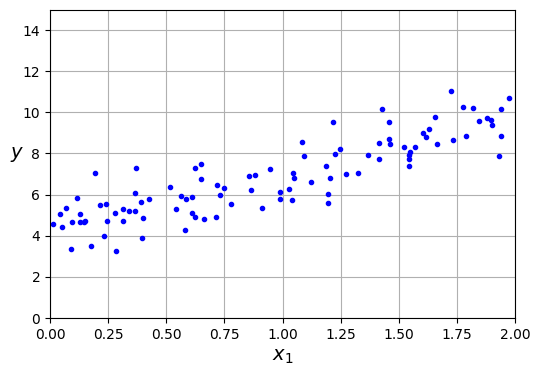

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid();

In [ ]:
matrix_a=np.array([[1,2],[3,4]])
matrix_b=np.array([[5,6],[7,8]])

result=matrix_a @ matrix_b
result1=np.dot(matrix_a,matrix_b)

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best=np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new=np.array([[0],[2]])
X_new_b=add_dummy_feature(X_new)
y_predict=X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

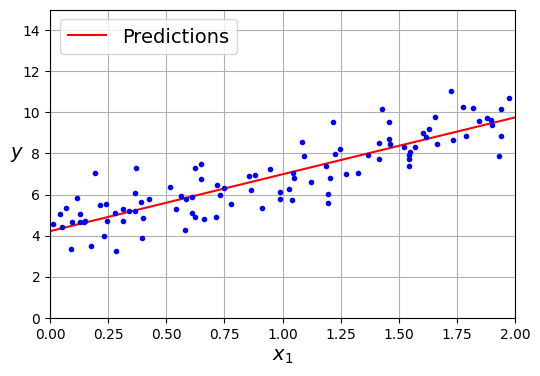

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_predict,'r-',label='Predictions')
plt.plot(X,y,'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc='upper left')

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)
reg.intercept_,reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [ ]:
eta=0.1
n_epochs=1
m=len(X_b)

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  gradients = 1 / m * 2 * X_b.T @ (X_b @ theta -y)
  theta = theta - eta * gradients

  print(theta)

[[1.78737583]
 [1.27927812]]


In [ ]:
np.random.seed(42)
eta=0.1
m=len(X_b)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index : random_index + 1]
    yi=y[random_index : random_index + 1]
    gradients= 2*xi.T@(xi@theta-yi)
    theta=theta-eta*gradients
  # gradients=1/m*2*X_b/.T@(X_b@theta-y)
  # theta=theta-eta*gradients

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-5,eta0=0.01,
                     n_iter_no_change=100,random_state=42)
sgd_reg.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=100, random_state=42, tol=1e-05)

In [ ]:
from math import ceil

n_epochs=50
eta=0.1
m=len(X_b)
minibatch_size=20
n_batches_per_epoch=ceil(m/minibatch_size)

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  shuffled_indices=np.random.permutation(m)
  X_b_shuffled=X_b[shuffled_indices]
  y_shuffled=y[shuffled_indices]
  for interation in range(0,n_batches_per_epoch):
    idx=iteration*minibatch_size
    xi=X_b_shuffled [idx:idx+minibatch_size]
    yi=y_shuffled [idx:idx+minibatch_size]
    gradients= 2/minibatch_size*xi.T@(xi@theta-yi)
    theta=theta-eta*gradients

# Polynomial Regression

In [ ]:
np.random.seed(42)
m=100
X=6* np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

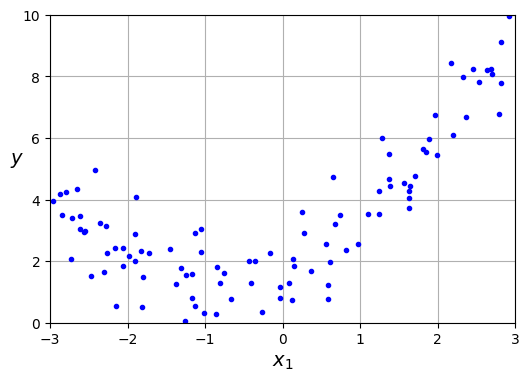

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

ler=LinearRegression()

ler.fit(X,y)
ler.score(X,y)

0.42600823789139797

In [ ]:
X_new=[[-3],[3]]
X_preds=ler.predict(X_new)
X_preds

array([[1.03315352],
       [6.09487734]])

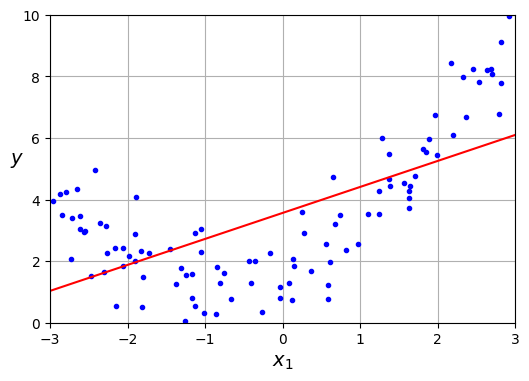

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.plot(X_new,X_preds,'r-')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat=PolynomialFeatures(degree=2,include_bias=False)

X_poly=poly_feat.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
ler.fit(X_poly,y)
ler.score(X_poly,y)

0.8525067519009746

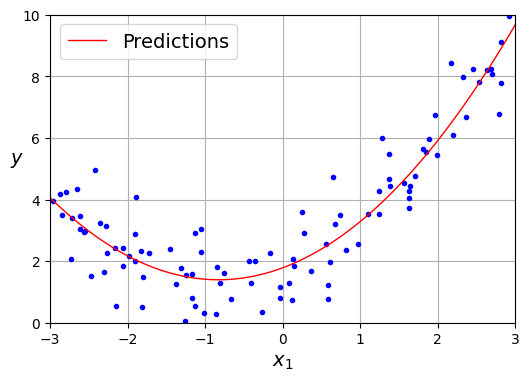

In [ ]:
X_new = np. linspace (-3, 3, 100). reshape (100, 1)
X_new_poly = poly_feat.transform (X_new)
y_new = ler.predict(X_new_poly)
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new,'r-',linewidth=1,label='Predictions')
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend (loc="upper left")
plt.axis ([-3, 3, 0, 10])
plt.grid()
plt.show()

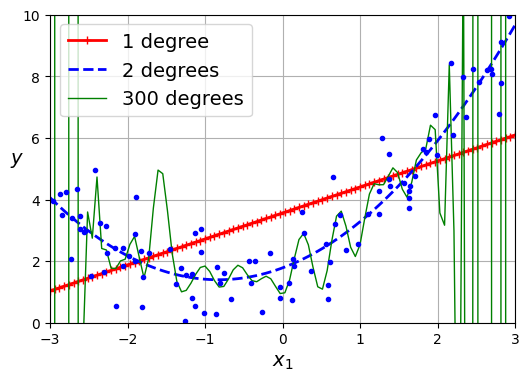

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6,4))
for style, width, degree in (('r-+',2,1),('b--',2,2),('g-',1,300)):
  polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler=StandardScaler()
  lin_reg=LinearRegression()
  polynimal_regression=make_pipeline(polybig_features,std_scaler,lin_reg)
  polynimal_regression.fit(X,y)
  y_newbig=polynimal_regression.predict(X_new)
  label=f"{degree} degree{'s' if degree > 1 else ''}"
  plt.plot(X_new,y_newbig,style,label=label,linewidth=width)

plt.plot(X,y,'b.',linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

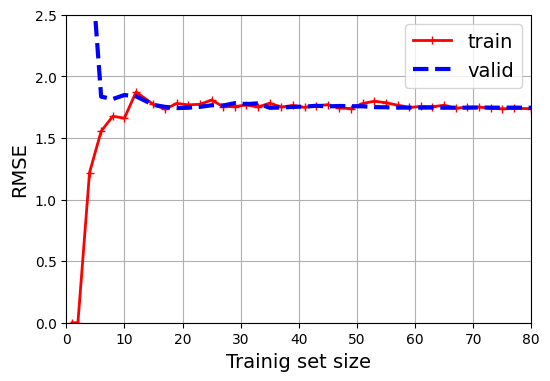

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes,train_scores,valid_scores=learning_curve(
    LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40),
    cv=5, scoring='neg_root_mean_squared_error')

train_errors=-train_scores.mean(axis=1)
valid_errors=-valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes,train_errors,'r-+',linewidth=2,label='train')
plt.plot(train_sizes,valid_errors,'b--',linewidth=3,label='valid')

plt.xlabel('Trainig set size')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc='upper right')
plt.axis([0,80,0,2.5])

plt.show

In [ ]:
from sklearn.pipeline import make_pipeline

poly_reg=make_pipeline(
    PolynomialFeatures(degree=10,include_bias=False),
    LinearRegression())

train_sizes,train_scores,valid_scores=learning_curve(
    poly_reg,X,y,train_sizes=np.linspace(0.01,1.0,40),
    cv=5, scoring='neg_root_mean_squared_error')

<function matplotlib.pyplot.show(close=None, block=None)>

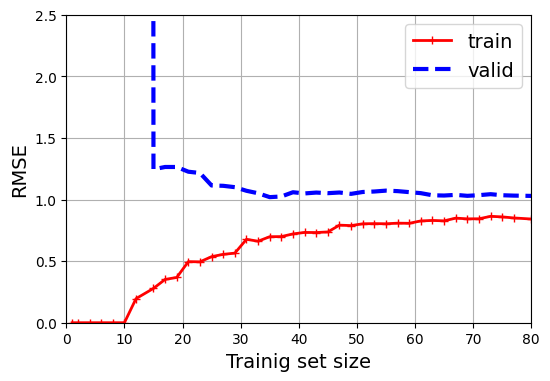

In [ ]:
train_errors=-train_scores.mean(axis=1)
valid_errors=-valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes,train_errors,'r-+',linewidth=2,label='train')
plt.plot(train_sizes,valid_errors,'b--',linewidth=3,label='valid')

plt.xlabel('Trainig set size')
plt.ylabel('RMSE')
plt.grid()
plt.legend(loc='upper right')
plt.axis([0,80,0,2.5])

plt.show

# Regularized Linear Model

In [ ]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

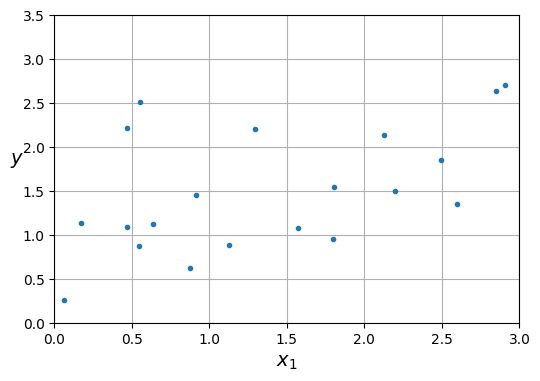

In [ ]:
X_new = np. linspace (0, 3, 100).reshape(100,1)
plt.figure(figsize=(6, 4))
plt.plot(X, y,'.')
plt.xlabel ("$x_1$")
plt.ylabel('$y$',rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import Ridge

ridge_reg=Ridge(alpha=0.1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [ ]:
sgd_reg=SGDRegressor(penalty='l2',
                     max_iter=1000,eta0=0.01,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [ ]:
ridge_reg=Ridge(alpha=0.1,solver='sag',random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

# Lasso Regulization

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [ ]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

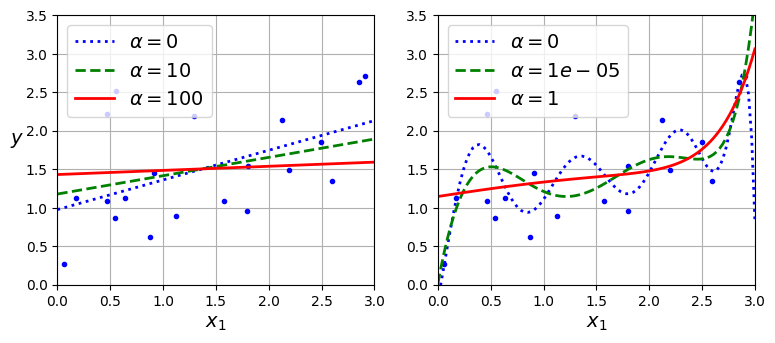

In [ ]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

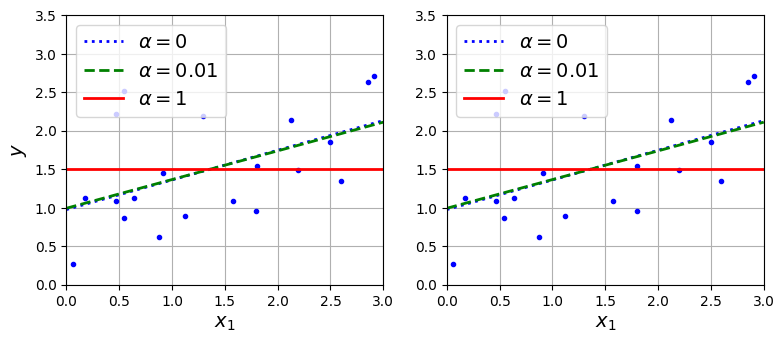

In [ ]:
plt.figure(figsize=(9,3.5))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas=(0,0.01,1),random_state=42)
plt.ylabel('$y$')
plt.subplot(122)
plot_model(Lasso,polynomial=False,alphas=(0,1e-2,1),random_state=42)
plt.show()

In [ ]:
from sklearn.linear_model import ElasticNet

ElasticNet=ElasticNet(alpha=0.1,l1_ratio=0.5)
ElasticNet.fit(X,y)
ElasticNet.predict([[1.5]])

array([1.54333232])

# Logistic Regression

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
X=iris.data[['petal width (cm)']].values
y=iris.target_names[iris.target]=='virginica'
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
log_reg.score(X_train,y_train)

0.9464285714285714